In [1]:
from collections.abc import Sequence
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Convert all missing values in the specified column to the default
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)


# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        print('CLASS')
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        print('REG')
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

# Function to plot results
def plot(results):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for activation in results['Activation'].unique():
        subset = results[results['Activation'] == activation]
        ax.plot(subset['Neurons'].astype(str), subset['RMSE'], marker='o', label=activation)

    ax.set_title('Model Performance by Activation Function')
    ax.set_xlabel('Layer Configuration (Neurons)')
    ax.set_ylabel('RMSE')
    ax.legend(title='Activation Function')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()

# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)


# Encode a column to a range between normalized_low and normalized_high.
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) \
               * (normalized_high - normalized_low) + normalized_low


REG


c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
136/136 - 3s - 25ms/step - loss: 2.3709 - val_loss: 0.4619
Epoch 2/1000
136/136 - 1s - 5ms/step - loss: 0.3914 - val_loss: 0.3546
Epoch 3/1000
136/136 - 1s - 4ms/step - loss: 0.2746 - val_loss: 0.3707
Epoch 4/1000
136/136 - 1s - 4ms/step - loss: 0.2185 - val_loss: 0.3743
Epoch 5/1000
136/136 - 1s - 4ms/step - loss: 0.1923 - val_loss: 0.3935
Epoch 6/1000
136/136 - 1s - 5ms/step - loss: 0.1675 - val_loss: 0.4025
Epoch 7/1000
136/136 - 1s - 6ms/step - loss: 0.1474 - val_loss: 0.4131
Epoch 8/1000
136/136 - 1s - 5ms/step - loss: 0.1250 - val_loss: 0.4151
Epoch 9/1000
136/136 - 1s - 5ms/step - loss: 0.1124 - val_loss: 0.4173
Epoch 10/1000
136/136 - 1s - 5ms/step - loss: 0.1001 - val_loss: 0.4150
Epoch 11/1000
136/136 - 1s - 6ms/step - loss: 0.0915 - val_loss: 0.4129
Epoch 12/1000
136/136 - 1s - 6ms/step - loss: 0.0848 - val_loss: 0.4211
Epoch 12: early stopping
Epoch 1/1000
136/136 - 3s - 25ms/step - loss: 2.7768 - val_loss: 0.4914
Epoch 2/1000
136/136 - 1s - 5ms/step - loss: 0.

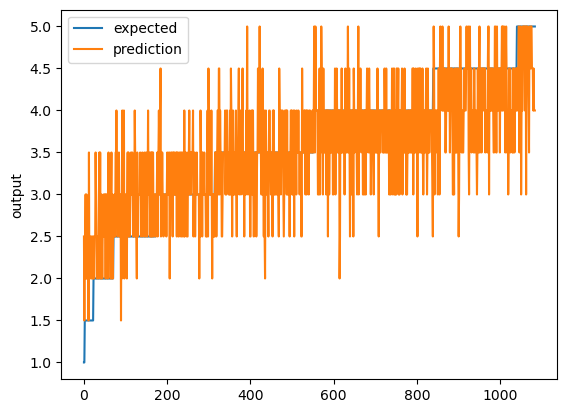

In [2]:
# Author: Nicolas Gugliemo, Katrina Yu
# Date: 9/16/2024
# Project: Project 1 Yelp Business Rating Prediction using Tensorflow
# Goal: Predict Business's stars rating... 
# (1) Report the RMSE and plot the lift chart of the BEST neural network model you have obtained.
# (2) Choose 5 arbitrary businesses from your test data (preferably from different categories). Show
#     the names, the true star ratings, and the predicted ratings (from your best model) of those
#     businesses.
# Type: Regression (Expect a number)
# Data Restrictions:
# (1) Businesses with at least 20 reviews
# (2) At least 10K businesses in set
# (3) Business = busisness_id, stars, review_count, categories
# (4) Review   = busisness_id, stars, text 
'''Grading:  (5 pts) Do train/test split.
 (5 pts) Remove all the businesses with less than 20 reviews.
 (10 pts) Use TF-IDF to do feature extraction from review texts.
 (10 pts) Use EarlyStopping when using Tensorflow.
 (30 pts) Change the following hyperparameters to record how they affect performance in your report.
Tabulate your findings.
o Activation: relu, sigmoid, tanh
o Layers and neuron counts
o Optimizer: adam and sgd
 (10 pts) Report the RMSE of the BEST regression model you obtained
 (10 pts) Plot the lift chart on test data of the BEST regression model you obtained
 (5 pts) Show names and the true ratings of 5 businesses, and their predicted ratings
 (5 pts) Your report includes the following sections:
o Problem Statement
o Methodology
o Experimental Results and Analysis
o Task Division and Project Reflection
 (10 pts) Additional features
'''
import random
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers

# Set path and preprocess for functions
path = "./yelp_dataset/"
preprocess = True

#Set paths for JSON
review_Path = os.path.join(path,"yelp_academic_dataset_review.json")
business_Path = os.path.join(path,"yelp_academic_dataset_business.json")

# Read JSON data and drop businesses with less than 20 reviews
review_df = pd.read_json(review_Path, lines=True, nrows = 100000)
all_business_df = pd.read_json(business_Path, lines=True, nrows = 100000)
business_df = all_business_df[all_business_df['review_count'] >= 20]

# You may use the following code to group ALL the reviews by each business and create a new
# dataframe, where each line is a business with all its reviews aggregated together. From there,
# you then use tfidfVectorzier to obtain TFIDF representation for each business.
df_review_agg = review_df.groupby('business_id')['text'].sum()
df_ready_to_be_sent_to_sklearn = pd.DataFrame({'business_id': df_review_agg.index,
                                               'all_reviews': df_review_agg.values,})

# Create table with ID, stars, and all reviews in one table then change 'stars' since this is already a col on tfidf
business_subset = business_df[['business_id', 'stars']]
business_names = business_df[['name', 'business_id']]
review_subset = df_ready_to_be_sent_to_sklearn[['business_id', 'all_reviews']]
merged_df = pd.merge(business_subset, review_subset, on='business_id', how='inner')
merged_df.rename(columns={'stars': 'stars_for_model'}, inplace=True)

# Initialize the tfidf Vectorizer and set max features and stop words
tfidf = TfidfVectorizer(max_features=4000,stop_words="english")

# Transform all_reviews and turn into a matrix
tfidf_matrix = tfidf.fit_transform(merged_df['all_reviews'])

# Turn the matrix into a dataframe where the cols are all the words. Then add the stars into the dataframe for model to use and use to_xy for tensorflow to read
tfidf_df = pd.DataFrame(data = tfidf_matrix.toarray(), columns = tfidf.get_feature_names_out())
tfidf_df = pd.concat([merged_df['stars_for_model'], tfidf_df] , axis=1)
x,y = to_xy(tfidf_df,'stars_for_model')

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Run the model 5 times to ensure best model is found
i = 0
while (i < 5):
    model = Sequential()
    model.add(Dense(100, input_dim=x.shape[1], activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(50, input_dim=x.shape[1], activation='relu')) 
    model.add(Dropout(0.1))
    model.add(Dense(25, input_dim=x.shape[1], activation='relu')) 
    model.add(Dense(1, activation='linear'))

    adam = optimizers.Adam(learning_rate=0.001, beta_1=0.999, beta_2=0.999, epsilon=None, amsgrad=False)
    model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')
    checkpointer = ModelCheckpoint(filepath="dnn/yelp.keras", verbose=0, save_best_only=True) # save best model

    # batch_size: Integer or None. Number of samples per gradient update. If unspecified, batch_size will default to 32.
    model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size= 32, callbacks=[monitor,checkpointer], verbose=2, epochs=1000)
    i = i+1

model.load_weights('dnn/yelp.keras') # load weights from best model

# Predict and measure RMSE
pred = model.predict(x_test)

# Rounding up preditcted values to .5
for i in pred:
    if i[0] < 5:
        i[0] = round(i[0]*2)/2
    if i[0] > 5:
        i[0] = 5

print(pred)
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print("Score (RMSE): {}".format(score))

# Plot the chart
chart_regression(pred.flatten(), y_test)


186. Biryani Hut pJB63RaQpkTIKBhfTsLQQg: rating: 4.0, predicted rating: [4.5]
665. George Thomas Florist n8mdmsfP08DSAQSTNfd-fw: rating: 4.5, predicted rating: [4.5]
317. Gandolfo's New York Deli lCBLhf37pnkyZ-1MWNF3ag: rating: 2.5, predicted rating: [4.5]
464. Banana's Music BgExC6utFsEhgyUqtw_ppg: rating: 4.5, predicted rating: [3.]
212. Picasso Restaurant & Bar jGewGnIYcf9LFBcR8lMC5g: rating: 3.0, predicted rating: [4.]


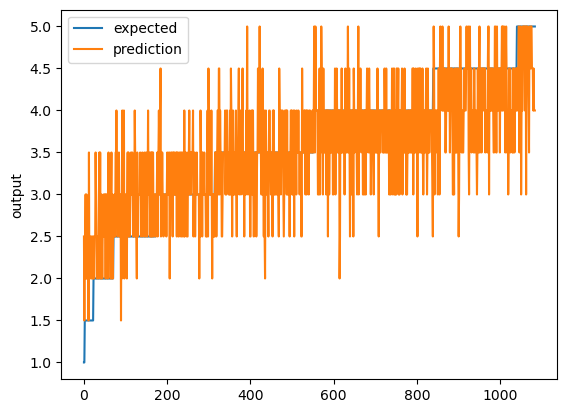

In [3]:
# Merged df to connect business names back to the star ratings
merged_name_star = pd.merge(business_names, merged_df, on='business_id', how='inner')
businesses = merged_name_star['name']
b_id = merged_name_star['business_id']

# Specific data prediction for 10 businesses
for i in range(5):
    j = random.randint(0, (pred.size) - 1)
    print("{}. {} {}: rating: {}, predicted rating: {}".format(j+1, businesses[j], b_id[j], y[j], pred[j]))

# Plot the chart
chart_regression(pred.flatten(),y_test)


                  business_id                    name               address  \
104    Dy91wdWkwtI_qgjAIZ0Niw     Taqueria Los Primos  3322 Old Capitol Trl   
153    aNtKyc2rr-uK5cqzY9TVQQ  Chipotle Mexican Grill     10160 Ulmerton Rd   
159    X_E7U2lVNEwbH_gpOBmAHQ          Cerveza Jack's         135 2nd Ave N   
278    W57cR9a7XP6RX56MSWHJJA          Las Margaritas      514 S Rampart St   
290    xa6JYHDgVza7CuenKBJBHw       Taqueria El Sitio   3466 A Lebanon Pike   
...                       ...                     ...                   ...   
99919  4E6kHJ7yxDpu43L8he6F7A      La Casita Taqueria           8400 Oak St   
99926  lWnqWDfcISTHnL973Uwplg    Mariscos Las Islitas      1700 S Wells Ave   
99953  vHys_KQJys2bSO2w1_WHrg         Los Tacos Locos         119 S York Rd   
99989  lkAzVdzEZE0jEU91PmvQhQ        Margaritas Grill  3320 Old Capitol Trl   
99993  Z2_-rlxyXQsqcGXChydhlA  La Guera Mexican Grill        132 Garrett Rd   

              city state postal_code   latitude   l

c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 - 2s - 409ms/step - loss: 13.3477 - val_loss: 12.0687
Epoch 2/1000
5/5 - 0s - 21ms/step - loss: 11.6235 - val_loss: 9.7771
Epoch 3/1000
5/5 - 0s - 27ms/step - loss: 8.9142 - val_loss: 6.5386
Epoch 4/1000
5/5 - 0s - 32ms/step - loss: 5.4614 - val_loss: 3.0504
Epoch 5/1000
5/5 - 0s - 24ms/step - loss: 2.2191 - val_loss: 1.1219
Epoch 6/1000
5/5 - 0s - 15ms/step - loss: 1.5987 - val_loss: 1.8037
Epoch 7/1000
5/5 - 0s - 15ms/step - loss: 1.7812 - val_loss: 1.3535
Epoch 8/1000
5/5 - 0s - 21ms/step - loss: 1.1774 - val_loss: 0.9800
Epoch 9/1000
5/5 - 0s - 15ms/step - loss: 0.9922 - val_loss: 0.9986
Epoch 10/1000
5/5 - 0s - 22ms/step - loss: 0.9406 - val_loss: 0.9422
Epoch 11/1000
5/5 - 0s - 21ms/step - loss: 0.8192 - val_loss: 0.8251
Epoch 12/1000
5/5 - 0s - 21ms/step - loss: 0.6835 - val_loss: 0.7795
Epoch 13/1000
5/5 - 0s - 21ms/step - loss: 0.5807 - val_loss: 0.7153
Epoch 14/1000
5/5 - 0s - 21ms/step - loss: 0.4706 - val_loss: 0.6543
Epoch 15/1000
5/5 - 0s - 23ms/step - loss: 0.4191 - 

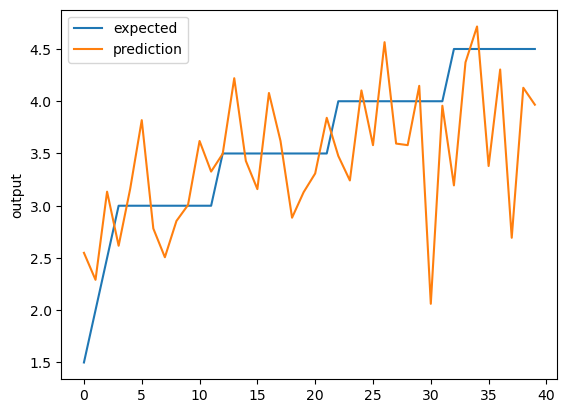

In [4]:
# Per Category 
ctgry = 'Mexican'


# Read JSON data and drop businesses with less than 20 reviews
review_df = pd.read_json(review_Path, lines=True, nrows = 100000)
all_business_df_0 = pd.read_json(business_Path, lines=True, nrows = 100000)
b_id = all_business_df[['business_id']]


# Filter to specific category
all_business_df = all_business_df_0[all_business_df_0['categories'].astype(str).str.contains(ctgry)]
print(all_business_df)

# Filter our businesses with less than 20 reviews
business_df = all_business_df[all_business_df['review_count'] >= 50]

#You may use the following code to group ALL the reviews by each business and create a new
#dataframe, where each line is a business with all its reviews aggregated together. From there,
#you then use tfidfVectorzier to obtain TFIDF representation for each business.
df_review_agg = review_df.groupby('business_id')['text'].sum()
df_ready_to_be_sent_to_sklearn = pd.DataFrame({'business_id': df_review_agg.index,
                                               'all_reviews': df_review_agg.values,})

#Create table with ID, stars, and all reviews in one table then change 'stars' since this is already a col on tfidf
business_subset = business_df[['business_id', 'stars']]
business_names = business_df[['name', 'business_id']]
review_subset = df_ready_to_be_sent_to_sklearn[['business_id', 'all_reviews']]
merged_df = pd.merge(business_subset, review_subset, on='business_id', how='inner')
merged_df.rename(columns={'stars': 'stars_for_model'}, inplace=True)

# Initialize the tfidf Vectorizer and set max features and stop words
tfidf = TfidfVectorizer(max_features=4000,stop_words="english")

# Transform all_reviews and turn into a matrix
tfidf_matrix = tfidf.fit_transform(merged_df['all_reviews'])

# Turn the matrix into a dataframe where the cols are all the words. Then add the stars into the dataframe for model to use and use to_xy for tensorflow to read
tfidf_df = pd.DataFrame(data = tfidf_matrix.toarray(), columns = tfidf.get_feature_names_out())
tfidf_df = pd.concat([merged_df['stars_for_model'], tfidf_df] , axis=1)
x,y = to_xy(tfidf_df,'stars_for_model')

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

#Run the model 5 times to ensure best model is found
i = 0
while (i < 5):
    model = Sequential()
    model.add(Dense(100, input_dim=x.shape[1], activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(50, input_dim=x.shape[1], activation='relu')) 
    model.add(Dropout(0.1))
    model.add(Dense(25, input_dim=x.shape[1], activation='relu')) 
    model.add(Dense(1, activation='linear'))

    adam = optimizers.Adam(learning_rate=0.001, beta_1=0.999, beta_2=0.999, epsilon=None, amsgrad=False)
    model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')
    checkpointer = ModelCheckpoint(filepath="dnn/yelp.keras", verbose=0, save_best_only=True) # save best model

    # batch_size: Integer or None. Number of samples per gradient update. If unspecified, batch_size will default to 32.
    model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size= 32, callbacks=[monitor,checkpointer], verbose=2, epochs=1000)
    i = i+1

model.load_weights('dnn/yelp.keras') # load weights from best model

# Predict and measure RMSE
pred = model.predict(x_test)
'''
# Rounding up preditcted values to .5
for i in pred:
    if i[0] < 5:
        i[0] = round(i[0]*2)/2 '''

print(pred)
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print("Score (RMSE): {}".format(score))

# Merged df to connect business names back to the star ratings
merged_name_star = pd.merge(business_names, merged_df, on='business_id', how='inner')
businesses = merged_name_star['name']
b_id = merged_name_star['business_id']

# Specific data prediction for 10 businesses
for j in range(10):
    #j = random.randint(0, (pred.size) - 1)
    print("{}. {} {}: rating: {}, predicted rating: {}".format(j+1, businesses[j], b_id[j], y[j], pred[j]))

# Plot the chart
chart_regression(pred.flatten(), y_test)


REG
Epoch 1/1000


c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


136/136 - 4s - 26ms/step - loss: 2.6503 - val_loss: 0.5019
Epoch 2/1000
136/136 - 1s - 5ms/step - loss: 0.5746 - val_loss: 0.4096
Epoch 3/1000
136/136 - 1s - 5ms/step - loss: 0.4139 - val_loss: 0.3638
Epoch 4/1000
136/136 - 1s - 4ms/step - loss: 0.3380 - val_loss: 0.3713
Epoch 5/1000
136/136 - 1s - 5ms/step - loss: 0.3155 - val_loss: 0.4094
Epoch 6/1000
136/136 - 1s - 5ms/step - loss: 0.2774 - val_loss: 0.4035
Epoch 7/1000
136/136 - 1s - 5ms/step - loss: 0.2484 - val_loss: 0.4021
Epoch 8/1000
136/136 - 1s - 5ms/step - loss: 0.2367 - val_loss: 0.4138
Epoch 9/1000
136/136 - 1s - 6ms/step - loss: 0.2239 - val_loss: 0.4007
Epoch 10/1000
136/136 - 1s - 6ms/step - loss: 0.2058 - val_loss: 0.3942
Epoch 11/1000
136/136 - 1s - 6ms/step - loss: 0.1994 - val_loss: 0.3957
Epoch 12/1000
136/136 - 1s - 7ms/step - loss: 0.1890 - val_loss: 0.4023
Epoch 13/1000
136/136 - 1s - 6ms/step - loss: 0.1816 - val_loss: 0.3859
Epoch 13: early stopping
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[[3.2919192]
 [3.2088

c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


136/136 - 1s - 10ms/step - loss: 1.5529 - val_loss: 0.6214
Epoch 2/1000
136/136 - 1s - 4ms/step - loss: 0.7945 - val_loss: 0.5812
Epoch 3/1000
136/136 - 1s - 4ms/step - loss: 0.7200 - val_loss: 0.5339
Epoch 4/1000
136/136 - 1s - 4ms/step - loss: 0.6350 - val_loss: 0.4744
Epoch 5/1000
136/136 - 0s - 4ms/step - loss: 0.5620 - val_loss: 0.4304
Epoch 6/1000
136/136 - 0s - 3ms/step - loss: 0.4884 - val_loss: 0.3680
Epoch 7/1000
136/136 - 0s - 3ms/step - loss: 0.4486 - val_loss: 0.3328
Epoch 8/1000
136/136 - 0s - 4ms/step - loss: 0.4109 - val_loss: 0.3305
Epoch 9/1000
136/136 - 0s - 3ms/step - loss: 0.3825 - val_loss: 0.3716
Epoch 10/1000
136/136 - 0s - 3ms/step - loss: 0.3718 - val_loss: 0.3097
Epoch 11/1000
136/136 - 0s - 3ms/step - loss: 0.3528 - val_loss: 0.3650
Epoch 12/1000
136/136 - 0s - 4ms/step - loss: 0.3359 - val_loss: 0.3370
Epoch 13/1000
136/136 - 0s - 3ms/step - loss: 0.3190 - val_loss: 0.3027
Epoch 14/1000
136/136 - 0s - 3ms/step - loss: 0.3124 - val_loss: 0.4581
Epoch 15/1000

c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


136/136 - 3s - 23ms/step - loss: 2.2382 - val_loss: 0.3720
Epoch 2/1000
136/136 - 1s - 7ms/step - loss: 0.4658 - val_loss: 0.4121
Epoch 3/1000
136/136 - 1s - 7ms/step - loss: 0.3510 - val_loss: 0.3777
Epoch 4/1000
136/136 - 1s - 7ms/step - loss: 0.2941 - val_loss: 0.3721
Epoch 5/1000
136/136 - 1s - 7ms/step - loss: 0.2479 - val_loss: 0.4147
Epoch 6/1000
136/136 - 1s - 7ms/step - loss: 0.2476 - val_loss: 0.3948
Epoch 7/1000
136/136 - 1s - 7ms/step - loss: 0.2242 - val_loss: 0.3896
Epoch 8/1000
136/136 - 1s - 7ms/step - loss: 0.2056 - val_loss: 0.4205
Epoch 9/1000
136/136 - 1s - 7ms/step - loss: 0.1899 - val_loss: 0.4068
Epoch 10/1000
136/136 - 1s - 7ms/step - loss: 0.1777 - val_loss: 0.4181
Epoch 11/1000
136/136 - 1s - 6ms/step - loss: 0.1806 - val_loss: 0.4068
Epoch 11: early stopping
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[2.7230923]
 [3.5386755]
 [2.379623 ]
 ...
 [4.6539006]
 [3.9313927]
 [4.2703514]]
Score (RMSE): 0.6098895072937012
Epoch 1/1000


c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


136/136 - 1s - 8ms/step - loss: 1.4381 - val_loss: 0.6116
Epoch 2/1000
136/136 - 0s - 3ms/step - loss: 0.7337 - val_loss: 0.5666
Epoch 3/1000
136/136 - 0s - 3ms/step - loss: 0.6547 - val_loss: 0.5009
Epoch 4/1000
136/136 - 0s - 4ms/step - loss: 0.5749 - val_loss: 0.4226
Epoch 5/1000
136/136 - 1s - 4ms/step - loss: 0.4897 - val_loss: 0.3675
Epoch 6/1000
136/136 - 0s - 3ms/step - loss: 0.4344 - val_loss: 0.3390
Epoch 7/1000
136/136 - 0s - 3ms/step - loss: 0.3894 - val_loss: 0.3711
Epoch 8/1000
136/136 - 0s - 4ms/step - loss: 0.3659 - val_loss: 0.3095
Epoch 9/1000
136/136 - 0s - 3ms/step - loss: 0.3514 - val_loss: 0.3044
Epoch 10/1000
136/136 - 1s - 4ms/step - loss: 0.3353 - val_loss: 0.3075
Epoch 11/1000
136/136 - 1s - 5ms/step - loss: 0.3140 - val_loss: 0.3034
Epoch 12/1000
136/136 - 1s - 5ms/step - loss: 0.3278 - val_loss: 0.2952
Epoch 13/1000
136/136 - 0s - 4ms/step - loss: 0.3029 - val_loss: 0.2937
Epoch 14/1000
136/136 - 0s - 3ms/step - loss: 0.2899 - val_loss: 0.3329
Epoch 15/1000


c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


136/136 - 2s - 18ms/step - loss: 2.0643 - val_loss: 0.3725
Epoch 2/1000
136/136 - 1s - 5ms/step - loss: 0.3484 - val_loss: 0.3466
Epoch 3/1000
136/136 - 1s - 5ms/step - loss: 0.2509 - val_loss: 0.3517
Epoch 4/1000
136/136 - 1s - 5ms/step - loss: 0.2034 - val_loss: 0.4063
Epoch 5/1000
136/136 - 1s - 5ms/step - loss: 0.1679 - val_loss: 0.3978
Epoch 6/1000
136/136 - 1s - 4ms/step - loss: 0.1498 - val_loss: 0.3876
Epoch 7/1000
136/136 - 1s - 5ms/step - loss: 0.1310 - val_loss: 0.3921
Epoch 8/1000
136/136 - 1s - 5ms/step - loss: 0.1184 - val_loss: 0.3918
Epoch 9/1000
136/136 - 1s - 4ms/step - loss: 0.1062 - val_loss: 0.3910
Epoch 10/1000
136/136 - 1s - 4ms/step - loss: 0.0984 - val_loss: 0.3937
Epoch 11/1000
136/136 - 1s - 5ms/step - loss: 0.0942 - val_loss: 0.3847
Epoch 12/1000
136/136 - 1s - 4ms/step - loss: 0.0876 - val_loss: 0.3822
Epoch 12: early stopping
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[2.7057588]
 [3.1213324]
 [2.3843396]
 ...
 [4.536126 ]
 [3.4326572]
 [3.8738308]]
Score (RM

c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


136/136 - 1s - 9ms/step - loss: 1.4311 - val_loss: 0.6421
Epoch 2/1000
136/136 - 0s - 4ms/step - loss: 0.7119 - val_loss: 0.6043
Epoch 3/1000
136/136 - 0s - 3ms/step - loss: 0.6621 - val_loss: 0.5622
Epoch 4/1000
136/136 - 1s - 4ms/step - loss: 0.6041 - val_loss: 0.5006
Epoch 5/1000
136/136 - 0s - 3ms/step - loss: 0.5254 - val_loss: 0.4276
Epoch 6/1000
136/136 - 0s - 3ms/step - loss: 0.4422 - val_loss: 0.3624
Epoch 7/1000
136/136 - 0s - 3ms/step - loss: 0.3868 - val_loss: 0.3593
Epoch 8/1000
136/136 - 0s - 3ms/step - loss: 0.3616 - val_loss: 0.3770
Epoch 9/1000
136/136 - 0s - 3ms/step - loss: 0.3374 - val_loss: 0.3086
Epoch 10/1000
136/136 - 0s - 3ms/step - loss: 0.3277 - val_loss: 0.3336
Epoch 11/1000
136/136 - 0s - 3ms/step - loss: 0.3130 - val_loss: 0.3198
Epoch 12/1000
136/136 - 0s - 3ms/step - loss: 0.3030 - val_loss: 0.2961
Epoch 13/1000
136/136 - 0s - 3ms/step - loss: 0.2859 - val_loss: 0.2922
Epoch 14/1000
136/136 - 0s - 3ms/step - loss: 0.2812 - val_loss: 0.2975
Epoch 15/1000


c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


136/136 - 3s - 21ms/step - loss: 2.1172 - val_loss: 0.6431
Epoch 2/1000
136/136 - 1s - 5ms/step - loss: 0.8168 - val_loss: 0.6382
Epoch 3/1000
136/136 - 1s - 5ms/step - loss: 0.8021 - val_loss: 0.6284
Epoch 4/1000
136/136 - 1s - 5ms/step - loss: 0.8004 - val_loss: 0.6044
Epoch 5/1000
136/136 - 1s - 5ms/step - loss: 0.7366 - val_loss: 0.5310
Epoch 6/1000
136/136 - 1s - 5ms/step - loss: 0.5911 - val_loss: 0.3622
Epoch 7/1000
136/136 - 1s - 5ms/step - loss: 0.4353 - val_loss: 0.3188
Epoch 8/1000
136/136 - 1s - 5ms/step - loss: 0.3726 - val_loss: 0.3001
Epoch 9/1000
136/136 - 1s - 5ms/step - loss: 0.3662 - val_loss: 0.2921
Epoch 10/1000
136/136 - 1s - 5ms/step - loss: 0.3364 - val_loss: 0.2867
Epoch 11/1000
136/136 - 1s - 4ms/step - loss: 0.3150 - val_loss: 0.2886
Epoch 12/1000
136/136 - 1s - 5ms/step - loss: 0.3062 - val_loss: 0.2866
Epoch 13/1000
136/136 - 1s - 5ms/step - loss: 0.2863 - val_loss: 0.2864
Epoch 14/1000
136/136 - 1s - 5ms/step - loss: 0.2769 - val_loss: 0.2895
Epoch 15/1000

c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
136/136 - 2s - 12ms/step - loss: 1.0139 - val_loss: 0.6475
Epoch 2/1000
136/136 - 1s - 4ms/step - loss: 0.8042 - val_loss: 0.6471
Epoch 3/1000
136/136 - 1s - 5ms/step - loss: 0.7938 - val_loss: 0.6537
Epoch 4/1000
136/136 - 1s - 4ms/step - loss: 0.7886 - val_loss: 0.6504
Epoch 5/1000
136/136 - 1s - 4ms/step - loss: 0.7666 - val_loss: 0.6458
Epoch 6/1000
136/136 - 0s - 4ms/step - loss: 0.7679 - val_loss: 0.6470
Epoch 7/1000
136/136 - 0s - 3ms/step - loss: 0.7642 - val_loss: 0.6515
Epoch 8/1000
136/136 - 0s - 3ms/step - loss: 0.7550 - val_loss: 0.6471
Epoch 9/1000
136/136 - 0s - 3ms/step - loss: 0.7435 - val_loss: 0.6467
Epoch 10/1000
136/136 - 0s - 3ms/step - loss: 0.7480 - val_loss: 0.6493
Epoch 11/1000
136/136 - 0s - 3ms/step - loss: 0.7437 - val_loss: 0.6459
Epoch 12/1000
136/136 - 0s - 3ms/step - loss: 0.7412 - val_loss: 0.6504
Epoch 13/1000
136/136 - 0s - 3ms/step - loss: 0.7365 - val_loss: 0.6597
Epoch 14/1000
136/136 - 0s - 3ms/step - loss: 0.7289 - val_loss: 0.6457


c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


136/136 - 3s - 22ms/step - loss: 1.1243 - val_loss: 0.6374
Epoch 2/1000
136/136 - 1s - 7ms/step - loss: 0.8030 - val_loss: 0.6116
Epoch 3/1000
136/136 - 1s - 7ms/step - loss: 0.7335 - val_loss: 0.5156
Epoch 4/1000
136/136 - 1s - 6ms/step - loss: 0.5593 - val_loss: 0.3345
Epoch 5/1000
136/136 - 1s - 6ms/step - loss: 0.4246 - val_loss: 0.3030
Epoch 6/1000
136/136 - 1s - 6ms/step - loss: 0.3530 - val_loss: 0.2928
Epoch 7/1000
136/136 - 1s - 6ms/step - loss: 0.3387 - val_loss: 0.2868
Epoch 8/1000
136/136 - 1s - 6ms/step - loss: 0.3301 - val_loss: 0.2893
Epoch 9/1000
136/136 - 1s - 7ms/step - loss: 0.3091 - val_loss: 0.3026
Epoch 10/1000
136/136 - 1s - 6ms/step - loss: 0.2836 - val_loss: 0.2909
Epoch 11/1000
136/136 - 1s - 7ms/step - loss: 0.2629 - val_loss: 0.2892
Epoch 12/1000
136/136 - 1s - 7ms/step - loss: 0.2609 - val_loss: 0.2977
Epoch 13/1000
136/136 - 1s - 6ms/step - loss: 0.2550 - val_loss: 0.3024
Epoch 14/1000
136/136 - 1s - 7ms/step - loss: 0.2443 - val_loss: 0.3071
Epoch 15/1000

c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


136/136 - 1s - 8ms/step - loss: 1.1357 - val_loss: 0.6513
Epoch 2/1000
136/136 - 0s - 3ms/step - loss: 0.7864 - val_loss: 0.6468
Epoch 3/1000
136/136 - 0s - 3ms/step - loss: 0.7977 - val_loss: 0.6456
Epoch 4/1000
136/136 - 0s - 3ms/step - loss: 0.7783 - val_loss: 0.6495
Epoch 5/1000
136/136 - 0s - 3ms/step - loss: 0.7635 - val_loss: 0.6511
Epoch 6/1000
136/136 - 0s - 3ms/step - loss: 0.7548 - val_loss: 0.6456
Epoch 7/1000
136/136 - 0s - 3ms/step - loss: 0.7478 - val_loss: 0.6458
Epoch 8/1000
136/136 - 0s - 3ms/step - loss: 0.7512 - val_loss: 0.6460
Epoch 9/1000
136/136 - 0s - 3ms/step - loss: 0.7476 - val_loss: 0.6507
Epoch 10/1000
136/136 - 0s - 3ms/step - loss: 0.7403 - val_loss: 0.6460
Epoch 11/1000
136/136 - 0s - 3ms/step - loss: 0.7317 - val_loss: 0.6468
Epoch 12/1000
136/136 - 0s - 3ms/step - loss: 0.7325 - val_loss: 0.6477
Epoch 13/1000
136/136 - 1s - 4ms/step - loss: 0.7401 - val_loss: 0.6541
Epoch 13: early stopping
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[3.614718 ]
 [3.61412

c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


136/136 - 4s - 27ms/step - loss: 0.9212 - val_loss: 0.6336
Epoch 2/1000
136/136 - 1s - 5ms/step - loss: 0.7298 - val_loss: 0.5812
Epoch 3/1000
136/136 - 1s - 5ms/step - loss: 0.5798 - val_loss: 0.3731
Epoch 4/1000
136/136 - 1s - 5ms/step - loss: 0.3896 - val_loss: 0.3061
Epoch 5/1000
136/136 - 1s - 5ms/step - loss: 0.3366 - val_loss: 0.3014
Epoch 6/1000
136/136 - 1s - 5ms/step - loss: 0.3073 - val_loss: 0.2888
Epoch 7/1000
136/136 - 1s - 5ms/step - loss: 0.2856 - val_loss: 0.2893
Epoch 8/1000
136/136 - 1s - 4ms/step - loss: 0.2636 - val_loss: 0.3304
Epoch 9/1000
136/136 - 1s - 5ms/step - loss: 0.2532 - val_loss: 0.2969
Epoch 10/1000
136/136 - 1s - 5ms/step - loss: 0.2370 - val_loss: 0.2923
Epoch 11/1000
136/136 - 1s - 5ms/step - loss: 0.2236 - val_loss: 0.2916
Epoch 12/1000
136/136 - 1s - 4ms/step - loss: 0.2156 - val_loss: 0.3092
Epoch 13/1000
136/136 - 1s - 5ms/step - loss: 0.2107 - val_loss: 0.3054
Epoch 14/1000
136/136 - 1s - 4ms/step - loss: 0.2003 - val_loss: 0.3064
Epoch 15/1000

c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


136/136 - 1s - 7ms/step - loss: 0.8145 - val_loss: 0.6867
Epoch 2/1000
136/136 - 0s - 3ms/step - loss: 0.7507 - val_loss: 0.6980
Epoch 3/1000
136/136 - 0s - 3ms/step - loss: 0.7523 - val_loss: 0.6657
Epoch 4/1000
136/136 - 0s - 3ms/step - loss: 0.7543 - val_loss: 0.6503
Epoch 5/1000
136/136 - 0s - 3ms/step - loss: 0.7346 - val_loss: 0.6668
Epoch 6/1000
136/136 - 0s - 3ms/step - loss: 0.7320 - val_loss: 0.6641
Epoch 7/1000
136/136 - 0s - 3ms/step - loss: 0.7328 - val_loss: 0.6461
Epoch 8/1000
136/136 - 0s - 4ms/step - loss: 0.7328 - val_loss: 0.6457
Epoch 9/1000
136/136 - 0s - 3ms/step - loss: 0.7286 - val_loss: 0.6460
Epoch 10/1000
136/136 - 0s - 3ms/step - loss: 0.7278 - val_loss: 0.6511
Epoch 11/1000
136/136 - 0s - 3ms/step - loss: 0.7250 - val_loss: 0.6675
Epoch 12/1000
136/136 - 0s - 4ms/step - loss: 0.7258 - val_loss: 0.6487
Epoch 13/1000
136/136 - 0s - 4ms/step - loss: 0.7156 - val_loss: 0.6488
Epoch 14/1000
136/136 - 0s - 3ms/step - loss: 0.7224 - val_loss: 0.6507
Epoch 15/1000


c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


136/136 - 3s - 20ms/step - loss: 1.5464 - val_loss: 0.4768
Epoch 2/1000
136/136 - 1s - 5ms/step - loss: 0.4640 - val_loss: 0.3347
Epoch 3/1000
136/136 - 1s - 6ms/step - loss: 0.3528 - val_loss: 0.2998
Epoch 4/1000
136/136 - 1s - 6ms/step - loss: 0.3023 - val_loss: 0.3324
Epoch 5/1000
136/136 - 1s - 5ms/step - loss: 0.2607 - val_loss: 0.3324
Epoch 6/1000
136/136 - 1s - 5ms/step - loss: 0.2377 - val_loss: 0.3502
Epoch 7/1000
136/136 - 1s - 4ms/step - loss: 0.2130 - val_loss: 0.3796
Epoch 8/1000
136/136 - 1s - 5ms/step - loss: 0.2091 - val_loss: 0.3759
Epoch 9/1000
136/136 - 1s - 5ms/step - loss: 0.1861 - val_loss: 0.3781
Epoch 10/1000
136/136 - 1s - 5ms/step - loss: 0.1805 - val_loss: 0.4192
Epoch 11/1000
136/136 - 1s - 5ms/step - loss: 0.1669 - val_loss: 0.4146
Epoch 12/1000
136/136 - 1s - 6ms/step - loss: 0.1564 - val_loss: 0.3993
Epoch 13/1000
136/136 - 1s - 5ms/step - loss: 0.1502 - val_loss: 0.4309
Epoch 13: early stopping
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[2.3427434]
 [3.6337

c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


136/136 - 1s - 9ms/step - loss: 1.0102 - val_loss: 0.7262
Epoch 2/1000
136/136 - 0s - 3ms/step - loss: 0.7152 - val_loss: 0.5485
Epoch 3/1000
136/136 - 0s - 3ms/step - loss: 0.6270 - val_loss: 0.5005
Epoch 4/1000
136/136 - 0s - 3ms/step - loss: 0.5107 - val_loss: 0.4242
Epoch 5/1000
136/136 - 0s - 3ms/step - loss: 0.4243 - val_loss: 0.3654
Epoch 6/1000
136/136 - 0s - 3ms/step - loss: 0.3819 - val_loss: 0.5083
Epoch 7/1000
136/136 - 0s - 3ms/step - loss: 0.3682 - val_loss: 0.3257
Epoch 8/1000
136/136 - 0s - 3ms/step - loss: 0.3397 - val_loss: 0.3066
Epoch 9/1000
136/136 - 0s - 3ms/step - loss: 0.3243 - val_loss: 0.3422
Epoch 10/1000
136/136 - 0s - 3ms/step - loss: 0.3169 - val_loss: 0.4388
Epoch 11/1000
136/136 - 0s - 3ms/step - loss: 0.3078 - val_loss: 0.3341
Epoch 12/1000
136/136 - 0s - 3ms/step - loss: 0.3032 - val_loss: 0.3263
Epoch 13/1000
136/136 - 0s - 3ms/step - loss: 0.2814 - val_loss: 0.3344
Epoch 14/1000
136/136 - 0s - 3ms/step - loss: 0.2929 - val_loss: 0.3033
Epoch 15/1000


c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


136/136 - 3s - 22ms/step - loss: 1.3388 - val_loss: 0.3349
Epoch 2/1000
136/136 - 1s - 7ms/step - loss: 0.3984 - val_loss: 0.3171
Epoch 3/1000
136/136 - 1s - 7ms/step - loss: 0.3149 - val_loss: 0.3225
Epoch 4/1000
136/136 - 1s - 8ms/step - loss: 0.2775 - val_loss: 0.3413
Epoch 5/1000
136/136 - 1s - 7ms/step - loss: 0.2417 - val_loss: 0.3579
Epoch 6/1000
136/136 - 1s - 7ms/step - loss: 0.2175 - val_loss: 0.3738
Epoch 7/1000
136/136 - 1s - 7ms/step - loss: 0.1957 - val_loss: 0.3724
Epoch 8/1000
136/136 - 1s - 6ms/step - loss: 0.1812 - val_loss: 0.4084
Epoch 9/1000
136/136 - 1s - 6ms/step - loss: 0.1726 - val_loss: 0.4150
Epoch 10/1000
136/136 - 1s - 6ms/step - loss: 0.1581 - val_loss: 0.4258
Epoch 11/1000
136/136 - 1s - 6ms/step - loss: 0.1495 - val_loss: 0.4276
Epoch 12/1000
136/136 - 1s - 6ms/step - loss: 0.1479 - val_loss: 0.4292
Epoch 12: early stopping
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[2.5612078]
 [3.5281856]
 [2.8054767]
 ...
 [4.4948726]
 [3.5483744]
 [4.199455 ]]
Score (RM

c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


136/136 - 1s - 8ms/step - loss: 0.9634 - val_loss: 0.5863
Epoch 2/1000
136/136 - 0s - 3ms/step - loss: 0.6810 - val_loss: 0.5172
Epoch 3/1000
136/136 - 0s - 3ms/step - loss: 0.5728 - val_loss: 0.4571
Epoch 4/1000
136/136 - 0s - 3ms/step - loss: 0.4670 - val_loss: 0.3701
Epoch 5/1000
136/136 - 0s - 3ms/step - loss: 0.4121 - val_loss: 0.3480
Epoch 6/1000
136/136 - 0s - 3ms/step - loss: 0.3745 - val_loss: 0.3302
Epoch 7/1000
136/136 - 0s - 3ms/step - loss: 0.3462 - val_loss: 0.3370
Epoch 8/1000
136/136 - 0s - 3ms/step - loss: 0.3391 - val_loss: 0.3171
Epoch 9/1000
136/136 - 0s - 3ms/step - loss: 0.3185 - val_loss: 0.3283
Epoch 10/1000
136/136 - 0s - 3ms/step - loss: 0.3062 - val_loss: 0.2985
Epoch 11/1000
136/136 - 0s - 4ms/step - loss: 0.2987 - val_loss: 0.3103
Epoch 12/1000
136/136 - 0s - 4ms/step - loss: 0.2969 - val_loss: 0.3160
Epoch 13/1000
136/136 - 1s - 5ms/step - loss: 0.2791 - val_loss: 0.2967
Epoch 14/1000
136/136 - 1s - 4ms/step - loss: 0.2639 - val_loss: 0.2983
Epoch 15/1000


c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


136/136 - 2s - 18ms/step - loss: 1.3536 - val_loss: 0.3295
Epoch 2/1000
136/136 - 1s - 4ms/step - loss: 0.3168 - val_loss: 0.3392
Epoch 3/1000
136/136 - 1s - 5ms/step - loss: 0.2362 - val_loss: 0.3510
Epoch 4/1000
136/136 - 1s - 5ms/step - loss: 0.2083 - val_loss: 0.3755
Epoch 5/1000
136/136 - 1s - 5ms/step - loss: 0.1853 - val_loss: 0.4111
Epoch 6/1000
136/136 - 1s - 5ms/step - loss: 0.1599 - val_loss: 0.4542
Epoch 7/1000
136/136 - 1s - 5ms/step - loss: 0.1539 - val_loss: 0.4283
Epoch 8/1000
136/136 - 1s - 4ms/step - loss: 0.1362 - val_loss: 0.4591
Epoch 9/1000
136/136 - 1s - 4ms/step - loss: 0.1254 - val_loss: 0.4413
Epoch 10/1000
136/136 - 1s - 5ms/step - loss: 0.1179 - val_loss: 0.4546
Epoch 11/1000
136/136 - 1s - 4ms/step - loss: 0.1084 - val_loss: 0.4903
Epoch 11: early stopping
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[2.499787 ]
 [3.426927 ]
 [2.5720637]
 ...
 [4.0976562]
 [3.7346852]
 [4.110852 ]]
Score (RMSE): 0.5739877223968506
Epoch 1/1000


c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


136/136 - 1s - 9ms/step - loss: 1.0128 - val_loss: 0.6043
Epoch 2/1000
136/136 - 0s - 3ms/step - loss: 0.6499 - val_loss: 0.5284
Epoch 3/1000
136/136 - 0s - 4ms/step - loss: 0.5548 - val_loss: 0.4389
Epoch 4/1000
136/136 - 0s - 4ms/step - loss: 0.4463 - val_loss: 0.3663
Epoch 5/1000
136/136 - 0s - 3ms/step - loss: 0.3788 - val_loss: 0.3357
Epoch 6/1000
136/136 - 0s - 3ms/step - loss: 0.3497 - val_loss: 0.3155
Epoch 7/1000
136/136 - 0s - 3ms/step - loss: 0.3240 - val_loss: 0.3106
Epoch 8/1000
136/136 - 0s - 3ms/step - loss: 0.3104 - val_loss: 0.3116
Epoch 9/1000
136/136 - 0s - 3ms/step - loss: 0.2999 - val_loss: 0.3010
Epoch 10/1000
136/136 - 0s - 3ms/step - loss: 0.2823 - val_loss: 0.3212
Epoch 11/1000
136/136 - 0s - 3ms/step - loss: 0.2687 - val_loss: 0.2979
Epoch 12/1000
136/136 - 0s - 3ms/step - loss: 0.2715 - val_loss: 0.2980
Epoch 13/1000
136/136 - 0s - 3ms/step - loss: 0.2622 - val_loss: 0.4024
Epoch 14/1000
136/136 - 0s - 3ms/step - loss: 0.2509 - val_loss: 0.3307
Epoch 15/1000


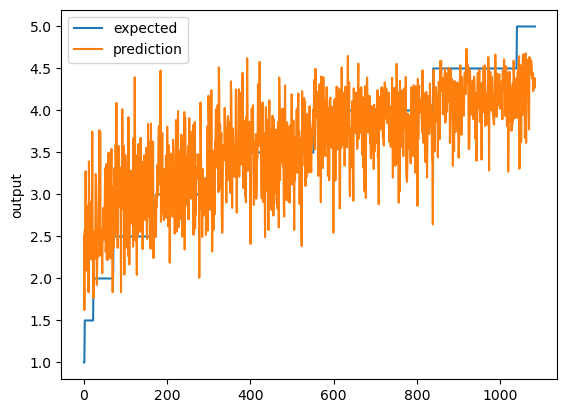

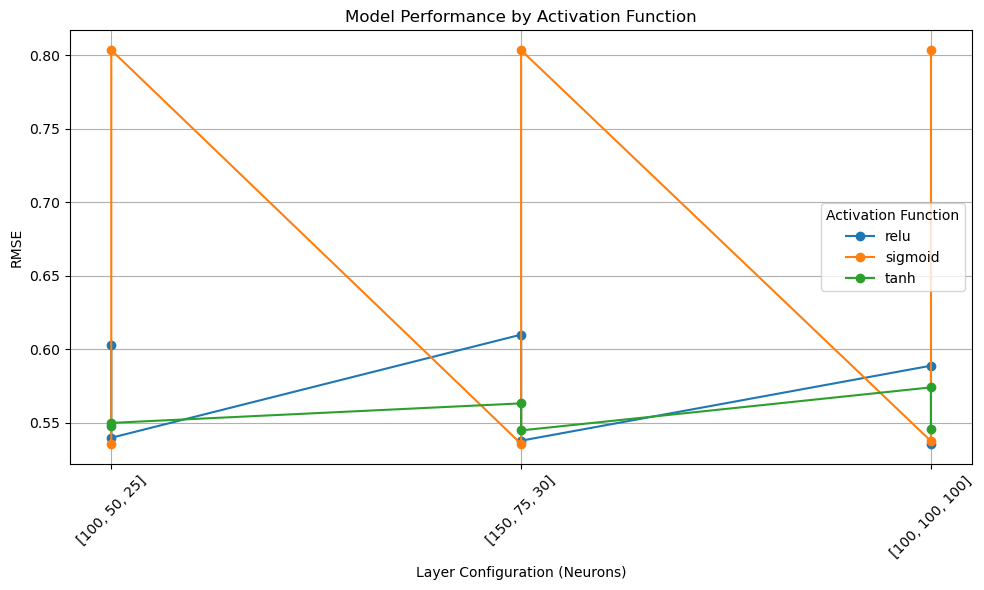

In [5]:
''' 
Tuning the following hyperparameters when training neural networks using Tensorflow and
tabulate all the results of each model on how they affect performance in your report. Also,
save all the models you have tried as a proof in your notebook.
• Activation: relu, sigmoid, tanh
• Number of layers and neuron count for each layer
• Optimizer: adam and sgd. 
'''

from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers

model_dir = "models"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Set path and preprocess for functions
path = "./yelp_dataset/"

#Set paths for JSON
review_Path = os.path.join(path,"yelp_academic_dataset_review.json")
business_Path = os.path.join(path,"yelp_academic_dataset_business.json")

# Read JSON data and drop businesses with less than 20 reviews
review_df = pd.read_json(review_Path, lines=True, nrows = 100000)
all_business_df = pd.read_json(business_Path, lines=True, nrows = 100000)
business_df = all_business_df[all_business_df['review_count'] >= 20]

#You may use the following code to group ALL the reviews by each business and create a new
#dataframe, where each line is a business with all its reviews aggregated together. From there,
#you then use tfidfVectorzier to obtain TFIDF representation for each business.
df_review_agg = review_df.groupby('business_id')['text'].sum()
df_ready_to_be_sent_to_sklearn = pd.DataFrame({'business_id': df_review_agg.index,
                                               'all_reviews': df_review_agg.values,})

#Create table with ID, stars, and all reviews in one table then change 'stars' since this is already a col on tfidf
business_subset = business_df[['business_id', 'stars']]
review_subset = df_ready_to_be_sent_to_sklearn[['business_id', 'all_reviews']]
merged_df = pd.merge(business_subset, df_ready_to_be_sent_to_sklearn, on='business_id', how='inner')
merged_df.rename(columns={'stars': 'stars_for_model'}, inplace=True)

# Initialize the tfidf Vectorizer and set max features and stop words
tfidf = TfidfVectorizer(max_features=4000,stop_words="english")

# Transform all_reviews and turn into a matrix
tfidf_matrix = tfidf.fit_transform(merged_df['all_reviews'])

# Turn the matrix into a dataframe where the cols are all the words. Then add the stars into the dataframe for model to use and use to_xy for tensorflow to read
tfidf_df = pd.DataFrame(data = tfidf_matrix.toarray(), columns = tfidf.get_feature_names_out())
tfidf_df = pd.concat([merged_df['stars_for_model'], tfidf_df] , axis=1)
x,y = to_xy(tfidf_df,'stars_for_model')

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Define hyperparameters that were requested
activations = ['relu', 'sigmoid', 'tanh']
layer_neurons = [[100, 50, 25], [150, 75, 30], [100, 100, 100]]  # Different layer configurations
optimizers = ['adam', 'sgd']

def Model_Test(activation, layer_neurons, optimizer):
    model = Sequential()
    model.add(Dense(layer_neurons[0], input_dim=x_train.shape[1], activation=activation))
    model.add(Dropout(0.1))
    for n in layer_neurons[1:]:
        model.add(Dense(n, activation=activation))
        model.add(Dropout(0.1))
    model.add(Dense(1, activation ='linear'))
    model.compile(loss='mean_squared_error', optimizer = optimizer)
    return model

best_rmse = float('inf')
best_model = None
best_params = {}

results = []

for activation in activations:
    for neurons in layer_neurons:
        for optimizer in optimizers:
            model = Model_Test(activation, neurons, optimizer)

            #
            monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')
            model_filename = f"model_{activation}_{neurons}_{optimizer}.keras"
            checkpointer = ModelCheckpoint(filepath=model_filename, verbose=0, save_best_only=True) # save best model

            # batch_size: Integer or None. Number of samples per gradient update. If unspecified, batch_size will default to 32.
            model.fit(x_train,y_train,validation_data=(x_test,y_test), batch_size= 32, callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

            #
            model.load_weights(model_filename)

            # Predict and measure RMSE
            pred = model.predict(x_test)
            print(pred)
            score = np.sqrt(metrics.mean_squared_error(pred,y_test))
            print("Score (RMSE): {}".format(score))

            # Store results
            results.append({
                'Activation': activation,
                'Neurons': str(neurons),
                'Optimizer': optimizer,
                'RMSE': score
            })

            if score < best_rmse:
                best_rmse = score
                best_model = model
                best_params = {
                    'Activation': activation,
                    'Neurons': neurons,
                    'Optimizer': optimizer,
                    'RMSE': best_rmse
                }

# Table of Results
results_df = pd.DataFrame(results)
print(results_df)

print("\nBest Combination:")
print(best_params)

# Plot the chart
pred = best_model.predict(x_test)
chart_regression(pred.flatten(), y_test)

plot(results_df)

REG
Epoch 1/1000


c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 - 2s - 47ms/step - loss: 4.5247 - val_loss: 1.2909
Epoch 2/1000
52/52 - 0s - 6ms/step - loss: 0.8074 - val_loss: 0.6427
Epoch 3/1000
52/52 - 0s - 6ms/step - loss: 0.3909 - val_loss: 0.4302
Epoch 4/1000
52/52 - 0s - 6ms/step - loss: 0.2633 - val_loss: 0.3753
Epoch 5/1000
52/52 - 0s - 6ms/step - loss: 0.1846 - val_loss: 0.3477
Epoch 6/1000
52/52 - 0s - 6ms/step - loss: 0.1681 - val_loss: 0.3380
Epoch 7/1000
52/52 - 0s - 6ms/step - loss: 0.1318 - val_loss: 0.3331
Epoch 8/1000
52/52 - 0s - 5ms/step - loss: 0.1279 - val_loss: 0.3433
Epoch 9/1000
52/52 - 0s - 6ms/step - loss: 0.1091 - val_loss: 0.3330
Epoch 10/1000
52/52 - 0s - 5ms/step - loss: 0.1034 - val_loss: 0.3333
Epoch 11/1000
52/52 - 0s - 5ms/step - loss: 0.0994 - val_loss: 0.3379
Epoch 12/1000
52/52 - 0s - 5ms/step - loss: 0.0982 - val_loss: 0.3359
Epoch 13/1000
52/52 - 0s - 5ms/step - loss: 0.0879 - val_loss: 0.3417
Epoch 14/1000
52/52 - 0s - 7ms/step - loss: 0.0887 - val_loss: 0.3175
Epoch 15/1000
52/52 - 0s - 6ms/step - los

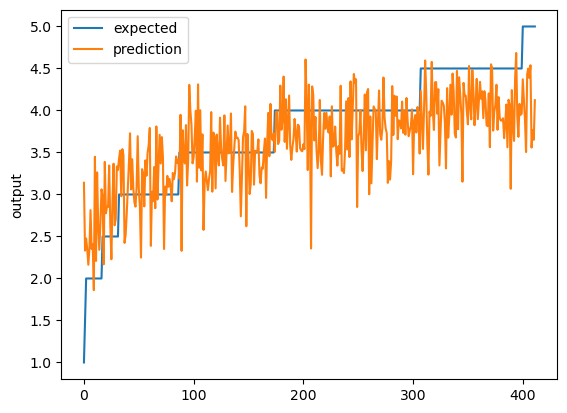

In [6]:
import random
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers

# Set path and preprocess for functions
path = "./yelp_dataset/"
preprocess = True

#Set paths for JSON
review_Path = os.path.join(path,"yelp_academic_dataset_review.json")
business_Path = os.path.join(path,"yelp_academic_dataset_business.json")

# Read JSON data and drop businesses with less than 70 reviews
review_df = pd.read_json(review_Path, lines=True, nrows = 100000)
all_business_df = pd.read_json(business_Path, lines=True, nrows = 100000)
business_df = all_business_df[all_business_df['review_count'] >= 70]

#You may use the following code to group ALL the reviews by each business and create a new
#dataframe, where each line is a business with all its reviews aggregated together. From there,
#you then use tfidfVectorzier to obtain TFIDF representation for each business.
df_review_agg = review_df.groupby('business_id')['text'].sum()
df_ready_to_be_sent_to_sklearn = pd.DataFrame({'business_id': df_review_agg.index,
                                               'all_reviews': df_review_agg.values,})

#Create table with ID, stars, and all reviews in one table then change 'stars' since this is already a col on tfidf
business_subset = business_df[['business_id', 'stars']]
business_names = business_df[['name', 'business_id']]
review_subset = df_ready_to_be_sent_to_sklearn[['business_id', 'all_reviews']]
merged_df = pd.merge(business_subset, review_subset, on='business_id', how='inner')
merged_df.rename(columns={'stars': 'stars_for_model'}, inplace=True)

# Initialize the tfidf Vectorizer and set max features and stop words
tfidf = TfidfVectorizer(max_features=4000,stop_words="english")

# Transform all_reviews and turn into a matrix
tfidf_matrix = tfidf.fit_transform(merged_df['all_reviews'])

# Turn the matrix into a dataframe where the cols are all the words. Then add the stars into the dataframe for model to use and use to_xy for tensorflow to read
tfidf_df = pd.DataFrame(data = tfidf_matrix.toarray(), columns = tfidf.get_feature_names_out())
tfidf_df = pd.concat([merged_df['stars_for_model'], tfidf_df] , axis=1)
x,y = to_xy(tfidf_df,'stars_for_model')

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

#Run the model 5 times to ensure best model is found
i = 0
while (i<10):
    model = Sequential()
    model.add(Dense(100, input_dim=x.shape[1], activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(50, input_dim=x.shape[1], activation='relu')) 
    model.add(Dropout(0.1))
    model.add(Dense(25, input_dim=x.shape[1], activation='relu')) 
    model.add(Dense(1, activation='linear'))

    adam = optimizers.Adam(learning_rate=0.001, beta_1=0.999, beta_2=0.999, epsilon=None, amsgrad=False)
    model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')
    checkpointer = ModelCheckpoint(filepath="dnn/yelp.keras", verbose=0, save_best_only=True) # save best model

    # batch_size: Integer or None. Number of samples per gradient update. If unspecified, batch_size will default to 32.
    model.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size= 32, callbacks=[monitor,checkpointer], verbose=2, epochs=1000)
    i = i+1

model.load_weights('dnn/yelp.keras') # load weights from best model

# Predict and measure RMSE
pred = model.predict(x_test)
print(pred)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))

# Merged df to connect business names back to the star ratings
merged_name_star = pd.merge(business_names, merged_df, on='business_id', how='inner')
businesses = merged_name_star['name']
b_id = merged_name_star['business_id']

# Specific data prediction for 10 businesses
for i in range(10):
    j = random.randint(0, (pred.size) - 1)
    print("{}. {} {}: rating: {}, predicted rating: {}".format(j+1, businesses[j], b_id[j], y[j], pred[j]))

# Plot the chart
chart_regression(pred.flatten(),y_test)


REG
Epoch 1/1000


c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 - 4s - 73ms/step - loss: 4.5298 - val_loss: 1.1955
Epoch 2/1000
49/49 - 1s - 22ms/step - loss: 0.9330 - val_loss: 0.5857
Epoch 3/1000
49/49 - 0s - 9ms/step - loss: 0.4721 - val_loss: 0.3890
Epoch 4/1000
49/49 - 0s - 8ms/step - loss: 0.2891 - val_loss: 0.2983
Epoch 5/1000
49/49 - 0s - 8ms/step - loss: 0.2190 - val_loss: 0.2798
Epoch 6/1000
49/49 - 0s - 7ms/step - loss: 0.1742 - val_loss: 0.2610
Epoch 7/1000
49/49 - 0s - 6ms/step - loss: 0.1622 - val_loss: 0.2641
Epoch 8/1000
49/49 - 0s - 6ms/step - loss: 0.1310 - val_loss: 0.2703
Epoch 9/1000
49/49 - 0s - 6ms/step - loss: 0.1268 - val_loss: 0.2931
Epoch 10/1000
49/49 - 0s - 6ms/step - loss: 0.1189 - val_loss: 0.2788
Epoch 11/1000
49/49 - 0s - 7ms/step - loss: 0.1074 - val_loss: 0.2668
Epoch 12/1000
49/49 - 1s - 14ms/step - loss: 0.1130 - val_loss: 0.2576
Epoch 13/1000
49/49 - 0s - 7ms/step - loss: 0.1008 - val_loss: 0.2801
Epoch 14/1000
49/49 - 0s - 7ms/step - loss: 0.0946 - val_loss: 0.2709
Epoch 15/1000
49/49 - 0s - 7ms/step - l

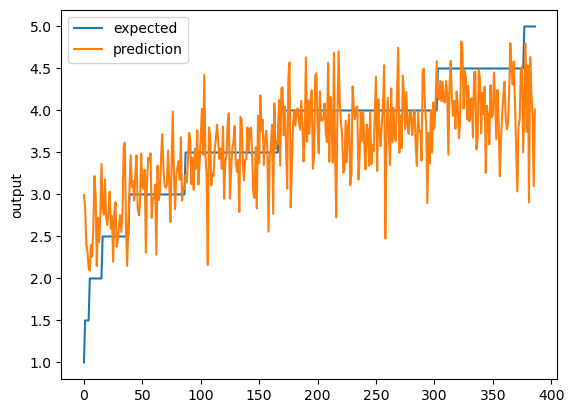

In [7]:
import random
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers

# Set path and preprocess for functions
path = "./yelp_dataset/"
preprocess = True

#Set paths for JSON
review_Path = os.path.join(path,"yelp_academic_dataset_review.json")
business_Path = os.path.join(path,"yelp_academic_dataset_business.json")

# Read JSON data and drop businesses with less than 75 reviews
review_df = pd.read_json(review_Path, lines=True, nrows = 100000)
all_business_df = pd.read_json(business_Path, lines=True, nrows = 100000)
business_df = all_business_df[all_business_df['review_count'] >= 75]

#You may use the following code to group ALL the reviews by each business and create a new
#dataframe, where each line is a business with all its reviews aggregated together. From there,
#you then use tfidfVectorzier to obtain TFIDF representation for each business.
df_review_agg = review_df.groupby('business_id')['text'].sum()
df_ready_to_be_sent_to_sklearn = pd.DataFrame({'business_id': df_review_agg.index,
                                               'all_reviews': df_review_agg.values,})

#Create table with ID, stars, and all reviews in one table then change 'stars' since this is already a col on tfidf
business_subset = business_df[['business_id', 'stars']]
business_names = business_df[['name', 'business_id']]
review_subset = df_ready_to_be_sent_to_sklearn[['business_id', 'all_reviews']]
merged_df = pd.merge(business_subset, review_subset, on='business_id', how='inner')
merged_df.rename(columns={'stars': 'stars_for_model'}, inplace=True)

# Initialize the tfidf Vectorizer and set max features and stop words
tfidf = TfidfVectorizer(max_features=4000,stop_words="english")

# Transform all_reviews and turn into a matrix
tfidf_matrix = tfidf.fit_transform(merged_df['all_reviews'])

# Turn the matrix into a dataframe where the cols are all the words. Then add the stars into the dataframe for model to use and use to_xy for tensorflow to read
tfidf_df = pd.DataFrame(data = tfidf_matrix.toarray(), columns = tfidf.get_feature_names_out())
tfidf_df = pd.concat([merged_df['stars_for_model'], tfidf_df] , axis=1)
x,y = to_xy(tfidf_df,'stars_for_model')

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

#Run the model 5 times to ensure best model is found
i = 0
while (i<5):
    model = Sequential()
    model.add(Dense(100, input_dim=x.shape[1], activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(50, input_dim=x.shape[1], activation='relu')) 
    model.add(Dropout(0.1))
    model.add(Dense(25, input_dim=x.shape[1], activation='relu')) 
    model.add(Dense(1, activation='linear'))

    adam = optimizers.Adam(learning_rate=0.001, beta_1=0.999, beta_2=0.999, epsilon=None, amsgrad=False)
    model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')
    checkpointer = ModelCheckpoint(filepath="dnn/yelp.keras", verbose=0, save_best_only=True) # save best model

    # batch_size: Integer or None. Number of samples per gradient update. If unspecified, batch_size will default to 32.
    model.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size= 32, callbacks=[monitor,checkpointer], verbose=2, epochs=1000)
    i = i+1

model.load_weights('dnn/yelp.keras') # load weights from best model

# Predict and measure RMSE
pred = model.predict(x_test)
print(pred)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))

# Merged df to connect business names back to the star ratings
merged_name_star = pd.merge(business_names, merged_df, on='business_id', how='inner')
businesses = merged_name_star['name']
b_id = merged_name_star['business_id']

for i in range(10):
    j = random.randint(0, (pred.size) - 1)
    print("{}. {} {}: rating: {}, predicted rating: {}".format(j+1, businesses[j], b_id[j], y[j], pred[j]))

# Plot the chart
chart_regression(pred.flatten(),y_test)
